In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

In [37]:
def emission_height(P, hmin, hmax, ncomp):
    """Function to determine the emission heights given hmin and hmax. Allowed emision heights for young 
       pulsars range between [950, 1000] and between [20, 1000] for old pulsars.
    
       Args:
       -----
       P      : rotational period.
       hmin   : minimum emission height (in km).
       hmax   : maximum emission height (in km).
       ncomp  : integer number of component .
       
       Returns:
       --------
       H      : random emission height.
    """
    
    #num_H = np.random.randint(3,8)  # random number of discrete emission height 
    num_H = ncomp
    
#   emission height for a short period pulsar: only one emission height 
    if P <= 0.15:
        if hmin >= 950 and hmax <= 1000:
            H = np.random.uniform(hmin, hmax, size=1)
            
        else: print "error, emission range not allowed for pulse period P < 0.15 seconds"
            
#   emission height for a long period pulsar:        
    if P > 0.15:
        if hmin >= 20 and hmax <= 1000:
            H = np.random.uniform(hmin, hmax, size=num_H)
        
        else: print "error, emission range not allowed for pulse period P > 0.15 seconds"
        
    return H

########################### simple test #############################
if __name__ == "__main__":
    P = 0.16
    hmin = 50
    hmax = 1000
    ncomp = 5
    heights = emission_height(P, hmin, hmax, ncomp)
    print heights  

[ 278.15142948  275.27272632  702.3634366   437.7188732   736.52027521]


[  0.00000000e+00   1.36022335e+00   2.71968987e+00   4.07764374e+00
   5.43333112e+00   6.78600118e+00   8.13490707e+00   9.47930689e+00
   1.08184646e+01   1.21516512e+01   1.34781451e+01   1.47972337e+01
   1.61082138e+01   1.74103925e+01   1.87030883e+01   1.99856315e+01
   2.12573651e+01   2.25176456e+01   2.37658436e+01   2.50013444e+01
   2.62235486e+01   2.74318728e+01   2.86257499e+01   2.98046297e+01
   3.09679792e+01   3.21152832e+01   3.32460446e+01   3.43597844e+01
   3.54560424e+01   3.65343770e+01   3.75943658e+01   3.86356054e+01
   3.96577114e+01   4.06603190e+01   4.16430825e+01   4.26056755e+01
   4.35477907e+01   4.44691401e+01   4.53694544e+01   4.62484833e+01
   4.71059953e+01   4.79417771e+01   4.87556336e+01   4.95473879e+01
   5.03168805e+01   5.10639692e+01   5.17885292e+01   5.24904520e+01
   5.31696456e+01   5.38260339e+01   5.44595563e+01   5.50701676e+01
   5.56578369e+01   5.62225482e+01   5.67642989e+01   5.72831001e+01
   5.77789760e+01   5.82519633e+01

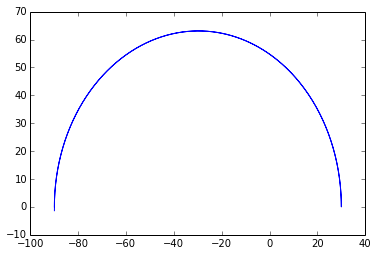

In [38]:
import mapphi as mp
def los(alpha, beta):
    """Function to determine the line of sight cut across the beam.
    
       Args:
       -----
       alpha       : inclination angle
       beta        : impact parameter
       
       Returns:
       --------
       xlos        : the line of sight x-coordinates
       ylos        : the line of sight y-coordinates
       avgthetalos : the line of sight angle in degrees
    """
    
    phi = np.arange(-180,180)
    xlos, ylos = mp.mapphi(alpha, beta, phi)
    thetalos = np.arctan2(ylos, xlos) * (180 / np.pi) - 90.0
    for i in np.arange(len(thetalos)):
        if thetalos[i] < 0:
            thetalos[i] = -thetalos[i]
            
#   find the average thetalos
    avgthetalos = np.average(thetalos)
    
    return xlos, ylos, avgthetalos
################## test ######################
if __name__ == "__main__":
    alpha = 30
    beta = 30
    xlos, ylos, avgthetalos = los(alpha, beta)
    print ylos
    plt.plot(xlos, ylos)
    #print avgthetalos, xlos

In [39]:
from scipy import constants
#import emission_height

def rho(P, heights):
    """Function to determine the opening angle rho given the rotational period and emission height.
       
    
       Args:
       -----
       P   : rotational period (seconds)
       H   : emission height (km)
       
       Returns:
       --------
       rho : the opening angle (degrees)
       
    """
    
    #H = emission_height(P, hmin, hmax, npatch)
    #print H
    rho = np.rad2deg(np.sqrt((9 * np.pi * heights) / (2 * (constants.c / 1000) * P)))   
    #rho = np.sqrt((9 * np.pi * H) / (2 * constants.c * P))
    return rho

#################### simple test #####################################
if __name__ == "__main__":
    opa = rho(P, heights)
    print opa

[ 16.40492053  16.31980912  26.06840325  20.57932468  26.69474866]


In [40]:
def patch_width(P, heights):
    """Function to calculate the width of a patchy emission region 
       within a pulsar beam at a given height.
    
       Args:
       -----
       P             : rotational period (seconds).
       hmin          : minimum emission height (in km).
       hmax          : maximum emission height (in km).
       npatch        : integer number of emission patches.
       
       Returns:
       --------
       patchwidths   : the width of the patchy emission region (degrees).
11.64332549  17.66376908  10.51189607]
    """   
    
    #H = emission_height(P, hmin, hmax, npatch)
    patchwidths = 2.45 * 0.2 * np.sqrt(heights / ( 10 * P)) 
    
    return patchwidths
#################### simple test ################################################
if __name__ == "__main__":
    patchwidths = patch_width(P, heights)
    print patchwidths



[  6.46065778   6.42713883  10.26637293   8.10463993  10.51304303]


In [41]:
def patch_center(P, heights):
    """Function find centres of the patches
       
       Args:
       -----
       P      : rotatinal period
       hmin   : minimum emission height (in km).
       hmax   : maximum emission height (in km).
       ncomp : number of emission components
       
       
       Returns:
       --------
       patch_centerx : the patch center projection on the x-axis 
       patch_centery : the patch center projection on the y-axis 
    """
    
    opa = rho(P, heights)  # opening angle of the beam (rho in degrees)
    centerx = []
    centery = []
    
    for comp in opa: #for each emission height (comp!)
        npatch = np.random.randint(2,10+1)
        #npatch = np.random.randint(1,3)
        tempCenterX = []
        tempCenterY = []
        theta = 2 * np.pi * np.random.random(npatch)
    
        #centers of the patches in the rotational plane (x,y coords):
        #np.random.seed(0) 
        #patch_centerx = np.zeros(npatch)
        #patch_centery = np.zeros(npatch)
    
        #print len(opa), opa

        #for short periods 
        if P <= 0.15:
            if hmin >= 950 and hmax <= 1000:
                for i in np.arange(npatch):
                    tempCenterX.append(comp * np.sin(theta[i]))
                    tempCenterY.append(comp * np.cos(theta[i]))
                
        #for longer periods
        if P > 0.15:
            if hmin >= 20 and hmax <= 1000:
                for i in np.arange(npatch):
                    tempCenterX.append(comp * np.sin(theta[i]))
                    tempCenterY.append(comp * np.cos(theta[i]))
        centerx.append(tempCenterX)
        centery.append(tempCenterY)
        
    return centerx, centery

########################### simple test ###########################
if __name__ == "__main__":
    cx, cy = patch_center(P, heights)
    for i in range(len(cx)):
        print 'height %i:\n'%i, cx[i], '\n', cy[i], '\n'

height 0:
[16.355326444068055, -15.13411142567403, -4.0905518587677339, -16.395640331782314, -1.5870982301023686, -11.564226943481918, 15.027528415182285, -5.5458120971505398] 
[-1.2746429306215403, -6.3308837493590149, 15.886749295666094, -0.5517207658303489, 16.327967935435851, 11.63572399519094, 6.5798789824360968, 15.439086303137049] 

height 1:
[1.5115882859819552, 3.2044104035511216, -7.7447279360643426, 8.0700951303856936, -14.580676580033215, 4.4028021007604341, -0.94084383153330864, -3.214390605111872] 
[16.249654478814204, 16.002122477745811, 14.365074278384673, -14.18484171267658, 7.3307598716391791, 15.714690690201442, 16.292666531658654, 16.00012071407378] 

height 2:
[-18.383809737514007, 25.497226252759464, 17.531404835962231, 25.495644199816486] 
[-18.48234799641952, 5.4270711568452024, -19.292783428097344, -5.4344985750510153] 

height 3:
[-7.6850407279237336, -9.6439719058422142, -20.342130146951686] 
[-19.090540940207774, 18.179725252569739, 3.1155008367957842] 

hei

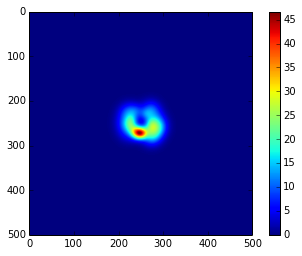

In [42]:
#import d2r
def plotpatch(P, alpha, beta, heights, centerx, centery):
    """Function to plot the patches for a given height range. Using a 2d gaussian
    
       Args:
       -----
       P       : rotational period (seconds)
       alpha   : inclination angle (degrees)
       beta    : impact parameter (degrees)
       hmin    : minimum emission height (in km)
       hmax    : maximum emission height (in km)
       npatch  : number of emission patches
       
       Returns:
       --------
       A plot of the patches projected on to observational plane.
    
    """    
    
#   make a 2D array:
    x = np.linspace(-180, 180, num=500, endpoint=True)
    y = np.linspace(-180, 180, num=500, endpoint=True)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros_like(X)

#   patchcenter or mean of the plot from patch center:
    #cx, cy, theta = patch_center(P, hmin, hmax, npatch)
    #print cx, cy, theta

#   choose random patch widths (wp) depending on how are patches specified:
    patchwidths = patch_width(P, heights)
    #wp = patchwidths 
    

#   wp == the spread (sigma)
#   project the sigmax and sigmay to the line of sight plane:
    #xlos, ylos, thetalos = los(alpha, beta)
    #thet = 5
    #theta = 2 * np.pi * np.random.random(npatch)
    
    peak = 5.
    for cid, comp in enumerate(heights):
        
        sigmax = patchwidths[cid]
        sigmay = patchwidths[cid]
    
        patchCenterX = centerx[cid]
        patchCenterY = centery[cid]
        
        # 2D gaussian:
        for pc in zip(patchCenterX, patchCenterY):
            Z += peak*np.exp(-((X - pc[0])**2 / (2*sigmax**2) + (Y - pc[1])**2 / (2*sigmay**2)))
    
        
        #peak = 5 # trial peak 
        #a = ((np.cos(theta) ** 2) / (2 * sigmax ** 2)) + ((np.sin(theta) ** 2) / (2 * sigmay ** 2))
        #b = (-(np.sin(2 * theta)) / (4 * sigmax ** 2)) + ((np.sin(2 * theta)) / (4 * sigmay ** 2))
        #c = ((np.sin(theta) ** 2) / (2 * sigmax ** 2)) + ((np.cos(theta) ** 2) / (2 * sigmay ** 2))
    
        #Z = []
        #if npatch > 1:
        #for i in np.arange(len(cx)):
        #    #Z = peak * np.exp(-(a[i] * (X - cx[i]) ** 2 - 2 * b[i] * (X - cx[i]) * (Y - cy[i]) + c[i] * (Y - cy[i]) ** 2))
        #    #Z.append(peak * np.exp(-(a[i] * (X - cx[i]) ** 2 - 2 * b[i] * (X - cx[i]) * (Y - cy[i]) + c[i] * (Y - cy[i]) ** 2)))
        #    Z.append(peak*np.exp(-((X - cx[i])**2 / (2*sigmax[i]**2) + (Y - cy[i])**2 / (2*sigmay[i]**2))))
        #if npatch == 1:
        #Z = peak * np.exp(-(a * (X - cx) ** 2 - 2 * b * (X - cx) * (Y - cy) + c * (Y - cy) ** 2)) 
    
    fig1 = plt.figure() # reason for multiple plots    
    #plt.contour(X, Y, Z)
    #plt.xlim(-90, 90)
    #plt.ylim(-90, 90)
    #plt.grid()
    plt.imshow(Z)
    plt.colorbar()
   
    
    
############################ simple test ##########################
if __name__ == "__main__":
    alpha = 10
    beta = 1
    plotpatch(P, alpha, beta, heights, cx, cy)